# Missing Data

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
df = pd.DataFrame(np.random.randn(5,3), index=['a','c','e','f','h'], columns=['one','two','three'])

In [6]:
df = df.reindex(['a','b','c','d','e','f','g','h'])

In [7]:
print(df)

        one       two     three
a  0.901869 -0.965619 -1.263266
b       NaN       NaN       NaN
c  0.769553  0.814341 -0.965251
d       NaN       NaN       NaN
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
g       NaN       NaN       NaN
h  0.176971  0.820976 -0.202921


In [8]:
#-------------------------Check for Missing Values---------------------
print(df.isnull())

     one    two  three
a  False  False  False
b   True   True   True
c  False  False  False
d   True   True   True
e  False  False  False
f  False  False  False
g   True   True   True
h  False  False  False


In [10]:
print(df['one'].isnull())

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool


In [11]:
print(df['one'].notnull())

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool


In [12]:
print(df.loc['b'].isnull())

one      True
two      True
three    True
Name: b, dtype: bool


In [13]:
#-----------------------Calculations with Missing Data-----------------------
#-----------------When summing data, NAN will be treated as Zero---------------------

print(df['one'].sum())

-0.5122909583281514


In [14]:
#--------------------If the data are all NAN, then the result will be NAN---------------------
df_NAN = pd.DataFrame(index=[0,1,2,3,4,5],columns=['one','two'])
print(df_NAN)

   one  two
0  NaN  NaN
1  NaN  NaN
2  NaN  NaN
3  NaN  NaN
4  NaN  NaN
5  NaN  NaN


In [15]:
print(df_NAN['one'].sum())

nan


In [16]:
#----------------Replace NAN with a scalar value---------------
print('NAN replaced with 0:')
print(df.fillna(0))

NAN replaced with 0:
        one       two     three
a  0.901869 -0.965619 -1.263266
b  0.000000  0.000000  0.000000
c  0.769553  0.814341 -0.965251
d  0.000000  0.000000  0.000000
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
g  0.000000  0.000000  0.000000
h  0.176971  0.820976 -0.202921


In [17]:
print(df.loc['b'].fillna(0))

one      0.0
two      0.0
three    0.0
Name: b, dtype: float64


In [18]:
#--------------Fill NA Forward and Backward------------------
print(df)

        one       two     three
a  0.901869 -0.965619 -1.263266
b       NaN       NaN       NaN
c  0.769553  0.814341 -0.965251
d       NaN       NaN       NaN
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
g       NaN       NaN       NaN
h  0.176971  0.820976 -0.202921


In [19]:
print(df.fillna(method='pad'))

        one       two     three
a  0.901869 -0.965619 -1.263266
b  0.901869 -0.965619 -1.263266
c  0.769553  0.814341 -0.965251
d  0.769553  0.814341 -0.965251
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
g -0.826819 -0.307268 -0.343363
h  0.176971  0.820976 -0.202921


In [20]:
print(df.fillna(method='backfill'))

        one       two     three
a  0.901869 -0.965619 -1.263266
b  0.769553  0.814341 -0.965251
c  0.769553  0.814341 -0.965251
d -1.533865  0.293921  0.986333
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
g  0.176971  0.820976 -0.202921
h  0.176971  0.820976 -0.202921


In [21]:
#----------Drop Missing Values------------

print(df.dropna())

        one       two     three
a  0.901869 -0.965619 -1.263266
c  0.769553  0.814341 -0.965251
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
h  0.176971  0.820976 -0.202921


In [22]:
# Drop all Rows with NAN
print(df.dropna(axis=0))

        one       two     three
a  0.901869 -0.965619 -1.263266
c  0.769553  0.814341 -0.965251
e -1.533865  0.293921  0.986333
f -0.826819 -0.307268 -0.343363
h  0.176971  0.820976 -0.202921


In [23]:
#Drop all column with NAN
print(df.dropna(axis=1))

Empty DataFrame
Columns: []
Index: [a, b, c, d, e, f, g, h]


In [24]:
#-------------------REplace Missing (or) Generic Values----------------------
df = pd.DataFrame({'one':[10,20,30,40,50,1000],'two':[2000,0,30,40,50,60]})
print(df)

    one   two
0    10  2000
1    20     0
2    30    30
3    40    40
4    50    50
5  1000    60


In [25]:
print(df.replace({1000:10,2000:20}))

   one  two
0   10   20
1   20    0
2   30   30
3   40   40
4   50   50
5   10   60


### Series Operation

In [28]:
# Create a Series with Random numbers

s = pd.Series(np.random.randn(10))
print(s)

0    0.687129
1   -0.346635
2   -2.087632
3    0.428180
4   -0.724876
5    0.075988
6    0.477909
7   -0.286843
8    1.063124
9    0.702187
dtype: float64


In [29]:
print('The axes are:')
print(s.axes)

The axes are:
[RangeIndex(start=0, stop=10, step=1)]


In [30]:
s2 = pd.Series(np.random.randn(4),index=[11,12,13,14])
print(s2)

11   -1.266935
12    0.328243
13    0.531938
14   -0.885459
dtype: float64


In [31]:
print('The axes are:')
print(s2.axes)

The axes are:
[Int64Index([11, 12, 13, 14], dtype='int64')]


In [32]:
se = pd.Series()
print(se)

Series([], dtype: float64)


In [33]:
print('Is the object empty?')
print(se.empty)

Is the object empty?
True


In [34]:
print('Is the object empty?')
print(s.empty)

Is the object empty?
False


In [35]:
print('The dimensions of the object:')
print(s.ndim)

The dimensions of the object:
1


In [36]:
print('THe size of the object:')
print(s.size)

THe size of the object:
10


In [37]:
print('The actual data series is:')
print(s.values)

The actual data series is:
[ 0.68712904 -0.34663512 -2.08763168  0.42818024 -0.7248757   0.07598803
  0.47790854 -0.28684329  1.06312353  0.70218734]


In [38]:
print('The first two elements of the data series:')
print(s.head(2))

The first two elements of the data series:
0    0.687129
1   -0.346635
dtype: float64


In [39]:
print('The last two elements of the data series:')
print(s.tail(2))

The last two elements of the data series:
8    1.063124
9    0.702187
dtype: float64


In [40]:
# Create a Dictionary of Series
d = {'Name':pd.Series(['Pranay','Swapnil','Ayush','Viraj','Bhusan','Ashwin','Vishal']),'Age':pd.Series([25,26,25,23,30,29,23]),'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8])}

In [41]:
# Create a DataFrame
s = pd.DataFrame(d,columns=['Name','Age','Rating'])
print('Our DataFrame is:')
print(s)

Our DataFrame is:
      Name  Age  Rating
0   Pranay   25    4.23
1  Swapnil   26    3.24
2    Ayush   25    3.98
3    Viraj   23    2.56
4   Bhusan   30    3.20
5   Ashwin   29    4.60
6   Vishal   23    3.80


In [42]:
print('The tranpose of the DataFrame is:')
print(s.T)

The tranpose of the DataFrame is:
             0        1      2      3       4       5       6
Name    Pranay  Swapnil  Ayush  Viraj  Bhusan  Ashwin  Vishal
Age         25       26     25     23      30      29      23
Rating    4.23     3.24   3.98   2.56     3.2     4.6     3.8


In [43]:
print('Row axis labels and column axis labels are:')
print(s.axes)

Row axis labels and column axis labels are:
[RangeIndex(start=0, stop=7, step=1), Index(['Name', 'Age', 'Rating'], dtype='object')]


In [44]:
print('The data type of each column are:')
print(s.dtypes)

The data type of each column are:
Name       object
Age         int64
Rating    float64
dtype: object


In [45]:
print('The dimension of the object is:')
print(s.ndim)

The dimension of the object is:
2


In [46]:
print('The shape of the object is:')
print(s.shape)

The shape of the object is:
(7, 3)


In [47]:
print('The total no of element in object is:')
print(s.size)

The total no of element in object is:
21


In [48]:
print('The actual data in our data frame is:')
print(s.values)

The actual data in our data frame is:
[['Pranay' 25 4.23]
 ['Swapnil' 26 3.24]
 ['Ayush' 25 3.98]
 ['Viraj' 23 2.56]
 ['Bhusan' 30 3.2]
 ['Ashwin' 29 4.6]
 ['Vishal' 23 3.8]]


In [49]:
print('The first two row of the data frame is:')
print(s.head(2))

The first two row of the data frame is:
      Name  Age  Rating
0   Pranay   25    4.23
1  Swapnil   26    3.24


In [50]:
print('The last two rows of the data frame is:')
print(s.tail(2))

The last two rows of the data frame is:
     Name  Age  Rating
5  Ashwin   29     4.6
6  Vishal   23     3.8


## Panel

In [51]:
import pandas as pd
import numpy as np

In [52]:
#--------------------Create an Empty Panel----------------------
p = pd.Panel()
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 0 (items) x 0 (major_axis) x 0 (minor_axis)
Items axis: None
Major_axis axis: None
Minor_axis axis: None


In [53]:
#----------------------------------------------------
data = np.random.rand(2,4,5)
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 5 (minor_axis)
Items axis: 0 to 1
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 4


In [54]:
print(p[0])

          0         1         2         3         4
0  0.566227  0.840255  0.497280  0.035067  0.472285
1  0.833978  0.245557  0.325105  0.362387  0.781824
2  0.277406  0.440616  0.992212  0.091301  0.414586
3  0.734579  0.814396  0.600397  0.523570  0.021103


In [55]:
print(p[1])

          0         1         2         3         4
0  0.031333  0.328254  0.574762  0.117367  0.297481
1  0.650257  0.347485  0.460098  0.022143  0.077354
2  0.702992  0.553149  0.376494  0.216233  0.246930
3  0.660752  0.287013  0.853902  0.326006  0.526321


In [56]:
#-------------------From dict of DataFrame objects----------------
data = {'Item1':pd.DataFrame(np.random.randn(4,3)),'Item2':pd.DataFrame(np.random.randn(4,2))}
p = pd.Panel(data)
print(p)

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 3 (minor_axis)
Items axis: Item1 to Item2
Major_axis axis: 0 to 3
Minor_axis axis: 0 to 2


In [57]:
#---------------------Using Items----------------------
print(p['Item1'])

          0         1         2
0  0.064530 -0.340025  1.588553
1  0.211556  1.167225  0.118199
2  0.714443  0.712447  0.913156
3 -0.818425 -0.200186  0.506151


In [58]:
print(p['Item2'])

          0         1   2
0 -0.555046  0.093118 NaN
1  1.299934  0.161448 NaN
2  1.433774  0.087613 NaN
3 -0.812590 -0.173795 NaN


In [59]:
#-------------Using major_axis------------------------
print(p.major_xs(1))

      Item1     Item2
0  0.211556  1.299934
1  1.167225  0.161448
2  0.118199       NaN


In [60]:
#-------------------------Using minor_axis------------------
print(p.minor_xs(1))

      Item1     Item2
0 -0.340025  0.093118
1  1.167225  0.161448
2  0.712447  0.087613
3 -0.200186 -0.173795


In [80]:
#-------------------------------------------------------------
from matplotlib import pyplot as plt
datan = np.random.randn(100)
datau = np.random.rand(100)

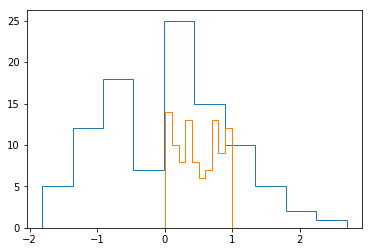

In [81]:
plt.hist(datan,histtype='step')
plt.hist(datau,histtype='step')
plt.show()

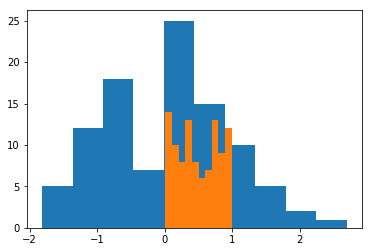

In [82]:
plt.hist(datan,histtype='bar')
plt.hist(datau,histtype='bar')
plt.show()